In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [49]:
plt.rcParams['font.family'] = ["Arial"]
plt.rcParams['font.size'] = 18

In [3]:
CN_MCI_folds_data = [
    {"Fold": 0, "Epoch": 200, "Loss": 0.209, "MCC": 0.7743485348273336, "Accuracy": 0.8877551020408163, "Precision": 0.8886661807580176},
    {"Fold": 1, "Epoch": 200, "Loss": 0.194, "MCC": 0.6629847260093013, "Accuracy": 0.826530612244898, "Precision": 0.8373466726977622},
    {"Fold": 2, "Epoch": 200, "Loss": 0.218, "MCC": 0.8561241929692257, "Accuracy": 0.9285714285714286, "Precision": 0.92890086852351},
    {"Fold": 3, "Epoch": 200, "Loss": 0.210, "MCC": 0.7989153108051731, "Accuracy": 0.8979591836734694, "Precision": 0.9009561271317039},
    {"Fold": 4, "Epoch": 200, "Loss": 0.191, "MCC": 0.7022402003404311, "Accuracy": 0.8571428571428571, "Precision": 0.8573988735279058}
]

In [25]:
MCI_AD_folds_data = [
    {"Fold": 0, "Epoch": 200, "Loss": 0.066, 'MCC': 0.8622762373379869, 'Accuracy': 0.9313725490196079, 'Precision': 0.9316448801742919},
    {"Fold": 1, "Epoch": 200, "Loss": 0.067, 'MCC': 0.8302187796948217, 'Accuracy': 0.9207920792079208, 'Precision': 0.9224546514801856},
    {"Fold": 2, "Epoch": 200, "Loss": 0.069, 'MCC': 0.9078861788617886, 'Accuracy': 0.9003960396039604, 'Precision': 0.9103960396039604},
    {"Fold": 3, "Epoch": 200, "Loss": 0.081, 'MCC': 0.8368648214961731, 'Accuracy': 0.9207920792079208, 'Precision': 0.93021425093329},
    {"Fold": 4, "Epoch": 200, "Loss": 0.071, 'MCC': 0.8792778495637553, 'Accuracy': 0.9405940594059405, 'Precision': 0.9416994331012049}
]

In [23]:
CN_AD_folds_data = [
    {"Fold": 0, "Epoch": 200, "Loss": 0.066, 'MCC': 0.8742806866361467, 'Accuracy': 0.9402985074626866, 'Precision': 0.9411373365729492},
    {"Fold": 1, "Epoch": 200, "Loss": 0.067, 'MCC': 0.8731534676229477, 'Accuracy': 0.9393939393939394, 'Precision': 0.9421328671328671},
    {"Fold": 2, "Epoch": 200, "Loss": 0.069, 'MCC': 0.9096846334879913, 'Accuracy': 0.9545454545454546, 'Precision': 0.9594155844155844},
    {"Fold": 3, "Epoch": 200, "Loss": 0.081, 'MCC': 0.8985972192062409, 'Accuracy': 0.9342424242424242, 'Precision': 0.9345636084345762},
    {"Fold": 4, "Epoch": 200, "Loss": 0.071, 'MCC': 0.8488746876271654, 'Accuracy': 0.9342424242424242, 'Precision': 0.9346323529411764}
]

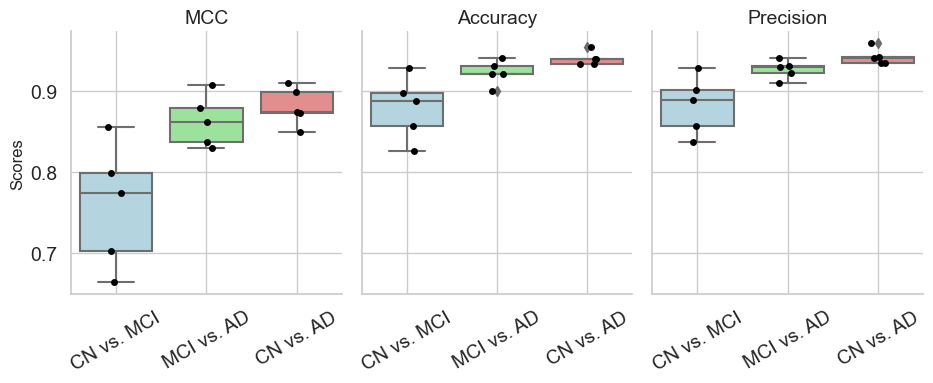

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 数据准备
CN_MCI_df = pd.DataFrame(CN_MCI_folds_data)
MCI_AD_df = pd.DataFrame(MCI_AD_folds_data)
CN_AD_df = pd.DataFrame(CN_AD_folds_data)

# 为数据添加组标签
CN_MCI_df['Group'] = 'CN vs. MCI'
MCI_AD_df['Group'] = 'MCI vs. AD'
CN_AD_df['Group'] = 'CN vs. AD'

# 合并数据集
combined_df = pd.concat([CN_MCI_df, MCI_AD_df, CN_AD_df])

# 转换数据为长格式，便于绘图
combined_long = combined_df.melt(id_vars=["Fold", "Epoch", "Loss", "Group"], var_name="Metric", value_name="Score")

# 设置图形样式
sns.set(style="whitegrid")

# 使用 FacetGrid 按 Metric 分组绘制图形
g = sns.FacetGrid(combined_long, col="Metric", height=4, aspect=0.8, col_wrap=3)
g.map_dataframe(sns.boxplot, x='Group', y='Score', palette=['lightblue', 'lightgreen', 'lightcoral'])
g.map_dataframe(sns.stripplot, x='Group', y='Score', color='black', jitter=True, size=5)

# 设置图形标题和标签
g.set_titles("{col_name}")
g.set_axis_labels("", "Scores")
for ax in g.axes.flat:
    # 设置刻度字体大小
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_xlabel("")
    ax.set_title(ax.get_title(), fontsize=14)
    ax.xaxis.grid(True)  
    #ax.yaxis.grid(True)# 添加水平网格线
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.tight_layout()
plt.show()
